In [9]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

## Load MNIST dataset

In [7]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata('MNIST original')

X = mnist.data
y = mnist.target

def preprocess_mnist(X, y):
    X_out = X.reshape((X.shape[0], 28, 28, 1))
    X_out = X_out/256
    y_out = keras.utils.to_categorical(y, 10)
    return X_out, y_out

X_processed, y_processed = preprocess_mnist(X, y)
print('X shape :', X.shape)
print('y shape :', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=10000, random_state=42)
print('number of training sample :', len(X_train))
print('number of testing sample :', len(X_test))

X shape : (70000, 784)
y shape : (70000,)
number of training sample : 60000
number of testing sample : 10000


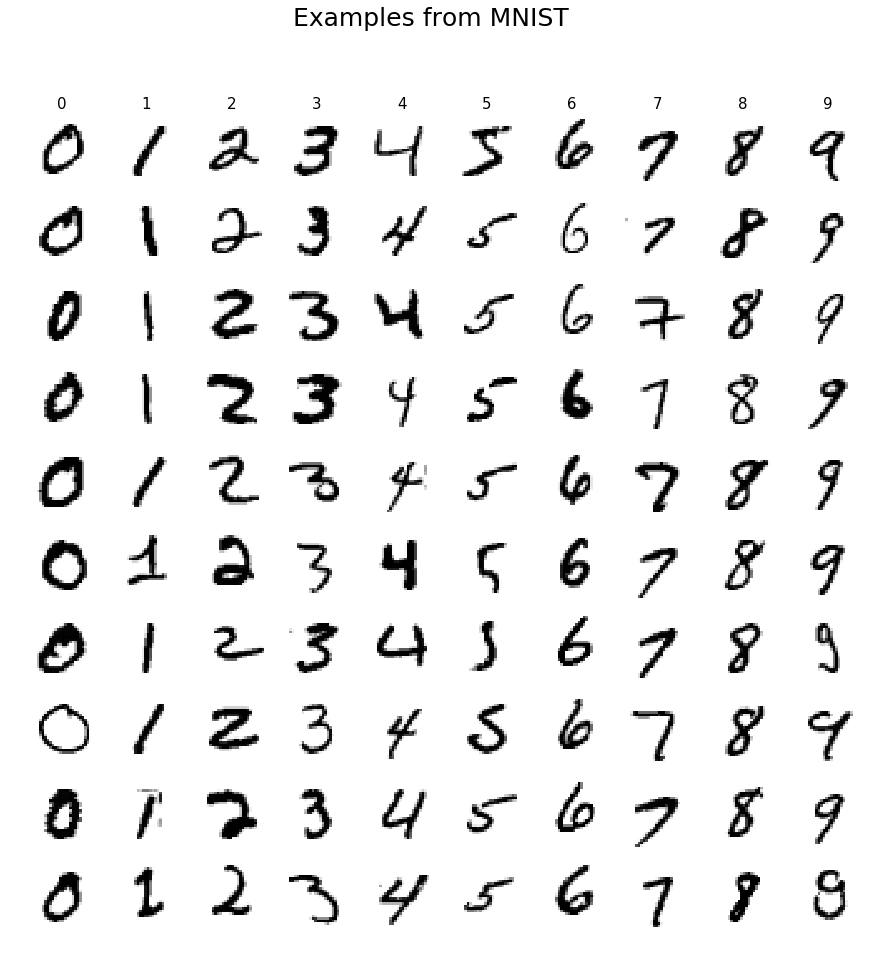

In [17]:
n_example = 10
examples = {}
for label in range(10):
    idx = y.ravel()==label
    examples[label] = X[idx][:n_example]

fig, axes = plt.subplots(n_example, 10)
fig.set_size_inches(15,15)
for label, axs in enumerate(axes.T):
    for example, ax in enumerate(axs):
        ax.imshow(examples[label][example].reshape((28,28)), cmap='gray_r')
        ax.axis('off')
        if example == 0:
            ax.set_title(label, fontsize=15)
plt.suptitle('Examples from MNIST', fontsize=25)
plt.savefig('MNIST_examples.png')

## Define the VGG-like model

In [3]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D((2,2), strides=2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D((2,2), strides=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 165us/step - loss: 0.2320 - acc: 0.9264 - val_loss: 0.0464 - val_acc: 0.9863
Epoch 2/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.0645 - acc: 0.9808 - val_loss: 0.0380 - val_acc: 0.9879
Epoch 3/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.0459 - acc: 0.9865 - val_loss: 0.0475 - val_acc: 0.9865
Epoch 4/10
48000/48000 [==============================] - 6s 127us/step - loss: 0.0332 - acc: 0.9900 - val_loss: 0.0318 - val_acc: 0.9896
Epoch 5/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.0275 - acc: 0.9910 - val_loss: 0.0477 - val_acc: 0.9875
Epoch 6/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.0225 - acc: 0.9927 - val_loss: 0.0325 - val_acc: 0.9918
Epoch 7/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.0188 - acc: 0.9937 - val_loss: 0.0331 - 

## Adding data augmentation

Add random rotation to the training data.

In [4]:
from keras.preprocessing.image import ImageDataGenerator

X_train_gen, X_val, y_train_gen, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

generator = ImageDataGenerator(rotation_range=15)
train_generator = generator.flow(X_train, y_train, batch_size=128)

val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=128)

In [5]:
model.fit_generator(train_generator, steps_per_epoch=375, epochs=10, validation_data=val_generator, validation_steps=1)

Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0392 - acc: 0.9878 - val_loss: 0.1008 - val_acc: 0.9766
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0296 - acc: 0.9908 - val_loss: 0.0304 - val_acc: 0.9844
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0270 - acc: 0.9919 - val_loss: 0.0369 - val_acc: 0.9922
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0247 - acc: 0.9930 - val_loss: 0.0674 - val_acc: 0.9766
Epoch 5/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0292 - val_acc: 0.9844
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0203 - acc: 0.9935 - val_loss: 0.0609 - val_acc: 0.9688
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0192 - acc: 0.9939 - val_loss: 0.0401 - val_acc: 0.9766
Epoch 8/10
375/375 [==============================] - 7s 17ms/step - 